# Comprehensive Flood Analysis and Forecasting for NYC

## Real-World Flood Modeling and Preparedness for Staten Island and NYC


This notebook provides a detailed analysis of flood sensor data, with a focus on addressing critical real-world flood issues in NYC, particularly Staten Island.
Key objectives include:
- Identifying safe and flood-prone areas.
- Detecting real-time flood events and trends.
- Forecasting flood levels, even with limited data.
- Providing risk assessments and highlighting recommendations for flood preparedness.
    

### Step 1: Data Loading and Initial Exploration

In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data
data_path = 'flood_sensor_data_Zhang.csv'
flood_data = pd.read_csv(data_path)

# Overview of the data structure and basic statistics
print(flood_data.info())
print(flood_data.describe())
flood_data.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      291 non-null    object 
 1   fs-00070  291 non-null    float64
 2   fs-00071  291 non-null    float64
 3   fs-00077  291 non-null    float64
 4   fs-00083  291 non-null    float64
 5   fs-00101  291 non-null    float64
 6   fs-00073  291 non-null    float64
 7   fs-00100  291 non-null    float64
 8   fs-00096  291 non-null    float64
 9   fs-00049  291 non-null    float64
 10  fs-00048  291 non-null    float64
 11  fs-00047  291 non-null    float64
 12  fs-00032  291 non-null    float64
 13  fs-00031  291 non-null    float64
dtypes: float64(13), object(1)
memory usage: 32.0+ KB
None
         fs-00070    fs-00071    fs-00077    fs-00083    fs-00101    fs-00073  \
count  291.000000  291.000000  291.000000  291.000000  291.000000  291.000000   
mean     0.181543    0.032800    0.100178    0.196

,Time,fs-00070,fs-00071,fs-00077,fs-00083,fs-00101,fs-00073,fs-00100,fs-00096,fs-00049,fs-00048,fs-00047,fs-00032,fs-00031
0,2023/09/29 00:00:00.000000,0.0,0.001667,0.000000,0.0,0.001616,0.002184,0.0,0.001914,0.005368,0.001408,0.0,0.332212,0.002923
1,2023/09/29 00:05:00.000000,0.0,0.001191,0.000000,0.0,0.002843,0.002407,0.0,0.001770,0.004406,0.000956,0.0,0.333371,0.003016
2,2023/09/29 00:10:00.000000,0.0,0.001021,0.000000,0.0,0.002423,0.002500,0.0,0.001671,0.005411,0.000523,0.0,0.334520,0.003376
3,2023/09/29 00:15:00.000000,0.0,0.001623,0.000121,0.0,0.001178,0.003007,0.0,0.001475,0.006206,0.000427,0.0,0.340833,0.003563
4,2023/09/29 00:20:00.000000,0.0,0.001555,0.000276,0.0,0.000928,0.003774,0.0,0.001323,0.006397,0.001076,0.0,0.354836,0.003297


### Step 2: Data Preprocessing - Time Handling and Normalization

In [3]:

# Convert 'Time' to datetime format and set it as the index
flood_data['Time'] = pd.to_datetime(flood_data['Time'])
flood_data.set_index('Time', inplace=True)

# Normalize sensor data for comparability
sensor_columns = flood_data.columns[1:]
scaler = StandardScaler()
flood_data[sensor_columns] = scaler.fit_transform(flood_data[sensor_columns])
flood_data.head()

# Explanation:
# - Converting to datetime allows time-based analysis and resampling.
# - Normalization standardizes sensor data, helping to compare flood levels across different sensors.
    

,fs-00070,fs-00071,fs-00077,fs-00083,fs-00101,fs-00073,fs-00100,fs-00096,fs-00049,fs-00048,fs-00047,fs-00032,fs-00031
Time,,,,,,,,,,,,,
2023-09-29 00:00:00,0.0,-0.562727,-0.754740,-0.727941,-0.487717,-0.682454,-0.943056,-0.364545,-0.589752,-1.292946,-0.859171,0.746583,0.216934
2023-09-29 00:05:00,0.0,-0.571334,-0.754740,-0.727941,-0.480845,-0.663025,-0.943056,-0.364780,-0.950818,-1.472011,-0.859171,0.751721,0.261236
2023-09-29 00:10:00,0.0,-0.574413,-0.754740,-0.727941,-0.483192,-0.654864,-0.943056,-0.364941,-0.573547,-1.643459,-0.859171,0.756819,0.434012
2023-09-29 00:15:00,0.0,-0.563516,-0.753832,-0.727941,-0.490169,-0.610718,-0.943056,-0.365261,-0.274997,-1.681435,-0.859171,0.784812,0.523538
2023-09-29 00:20:00,0.0,-0.564746,-0.752661,-0.727941,-0.491566,-0.543825,-0.943056,-0.365508,-0.203586,-1.424602,-0.859171,0.846908,0.395969


### Step 3: Simple Anomaly Detection for Real-Time Flood Events

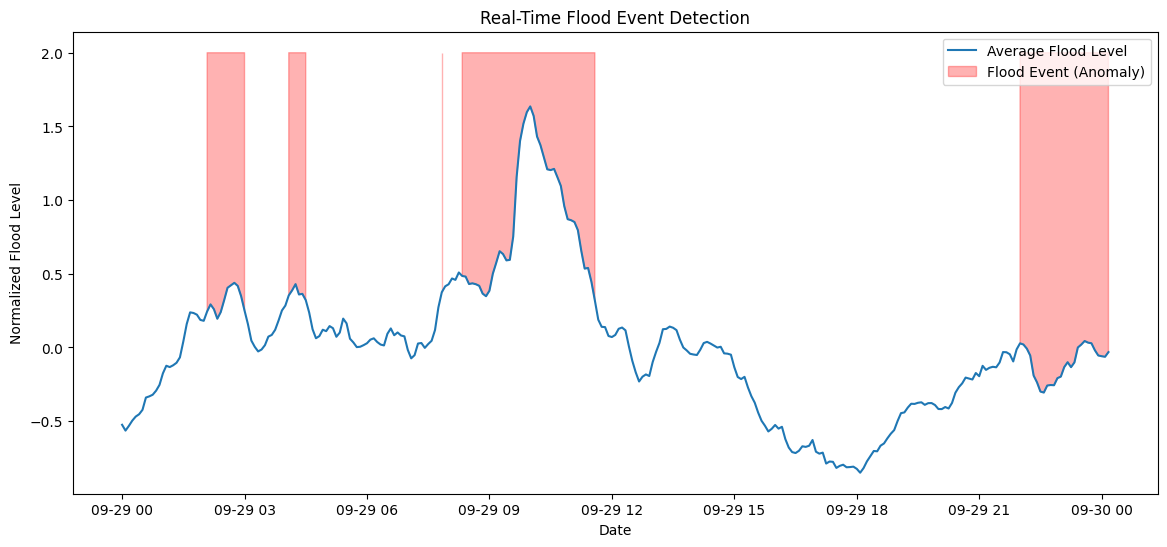

In [4]:

# Define a threshold to flag flood events (e.g., two standard deviations above mean)
anomaly_threshold = 2
anomalies = (flood_data[sensor_columns] > anomaly_threshold).any(axis=1)

# Plot anomalies to visualize real-time flood events
plt.figure(figsize=(14, 6))
plt.plot(flood_data.index, flood_data[sensor_columns].mean(axis=1), label="Average Flood Level")
plt.fill_between(flood_data.index, anomaly_threshold, flood_data[sensor_columns].mean(axis=1), 
                 where=anomalies, color='red', alpha=0.3, label="Flood Event (Anomaly)")
plt.legend()
plt.title("Real-Time Flood Event Detection")
plt.xlabel("Date")
plt.ylabel("Normalized Flood Level")
plt.show()

# Explanation:
# - This approach flags high-risk periods by setting an anomaly threshold.
# - Any flood level above this threshold is treated as a flood event, helping alert response teams in real-time.
    

### Step 4: Correlation Analysis Across Sensors to Detect Patterns

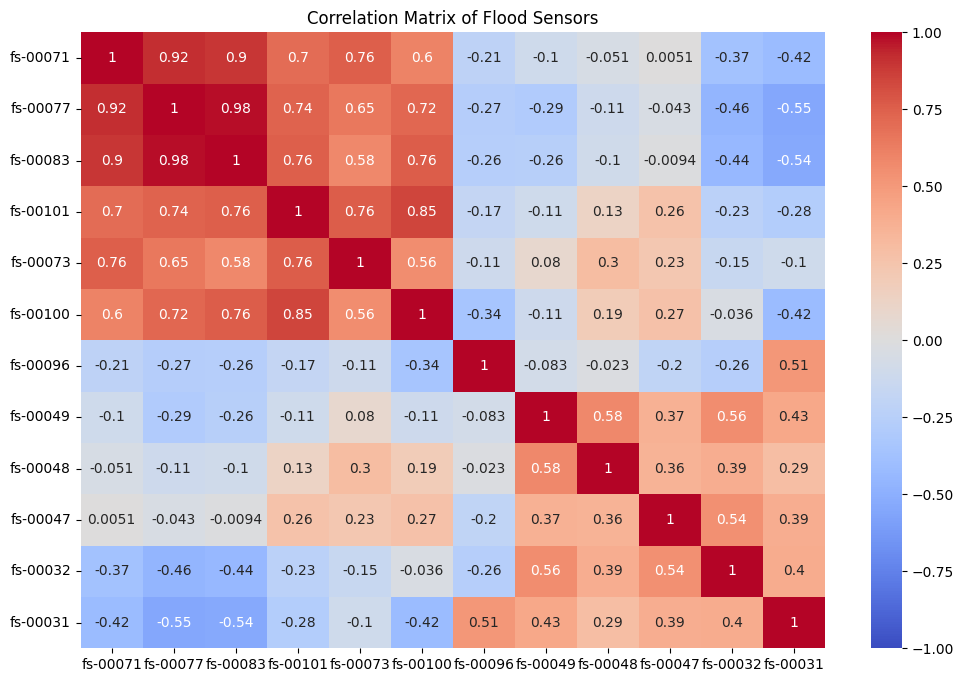

In [5]:

# Compute correlation matrix for sensors to explore spatial relationships
correlation_matrix = flood_data[sensor_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Flood Sensors")
plt.show()

# Insight:
# - High correlation between sensors may indicate spatially connected flood patterns.
# - This helps in predicting flooding based on nearby sensor activity and planning coordinated responses.
    

### Step 5: Rolling Average for Trend Analysis

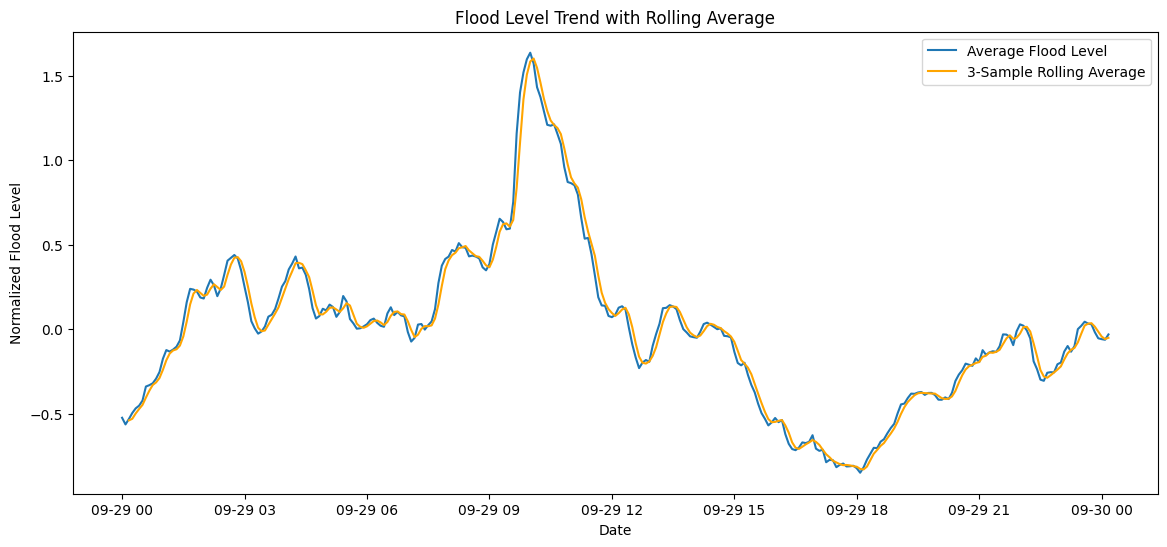

In [6]:

# Use a rolling average to smooth and observe flood trends
window_size = 3  # 3-sample rolling window for smoothing
rolling_avg = flood_data[sensor_columns].mean(axis=1).rolling(window=window_size).mean()

# Plot the rolling average
plt.figure(figsize=(14, 6))
plt.plot(flood_data.index, flood_data[sensor_columns].mean(axis=1), label="Average Flood Level")
plt.plot(rolling_avg, color='orange', label=f"{window_size}-Sample Rolling Average")
plt.legend()
plt.title("Flood Level Trend with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Normalized Flood Level")
plt.show()

# Explanation:
# - A rolling average reduces noise, making it easier to see underlying trends.
# - Trends can indicate gradual changes in flood risk, helping plan for future infrastructure needs.
    

### Step 6: Risk Mapping for High and Low Flood Risk Sensors

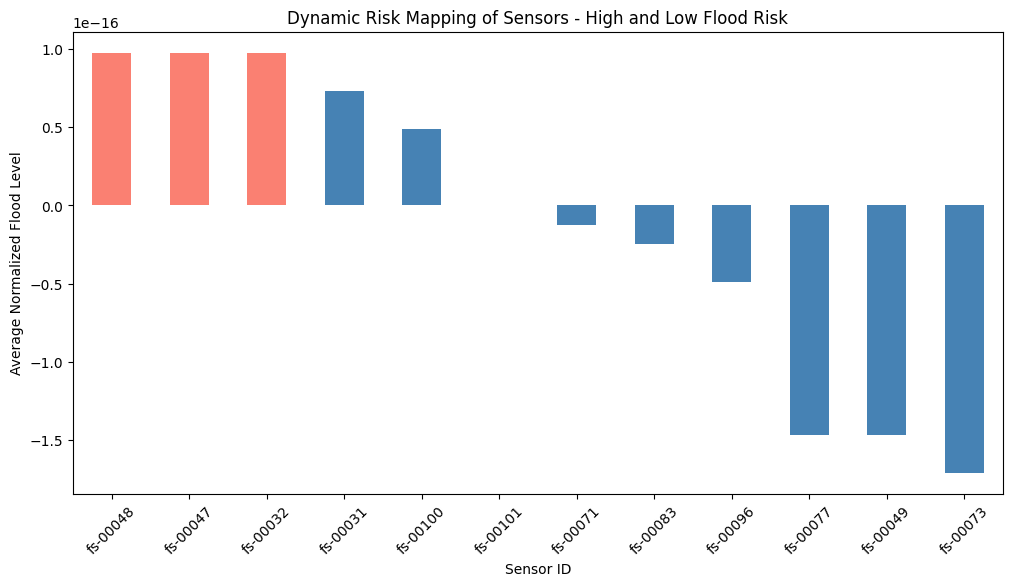

In [7]:

# Calculate average flood levels by sensor to identify high and low-risk areas
location_risks = flood_data[sensor_columns].mean().sort_values(ascending=False)

# Plot highlighting high-risk (top 3) and low-risk (bottom 3) sensors
plt.figure(figsize=(12, 6))
location_risks.plot(kind='bar', color=['salmon' if x in location_risks.head(3).index else 'steelblue' for x in location_risks.index])
plt.title("Dynamic Risk Mapping of Sensors - High and Low Flood Risk")
plt.xlabel("Sensor ID")
plt.ylabel("Average Normalized Flood Level")
plt.xticks(rotation=45)
plt.show()

# Insight:
# - This map allows visual prioritization of sensors in flood-prone vs. safe areas.
# - Such maps aid in resource allocation, focusing on high-risk zones.
    

### Step 7: Simple Forecasting Model to Predict Short-Term Flood Risk

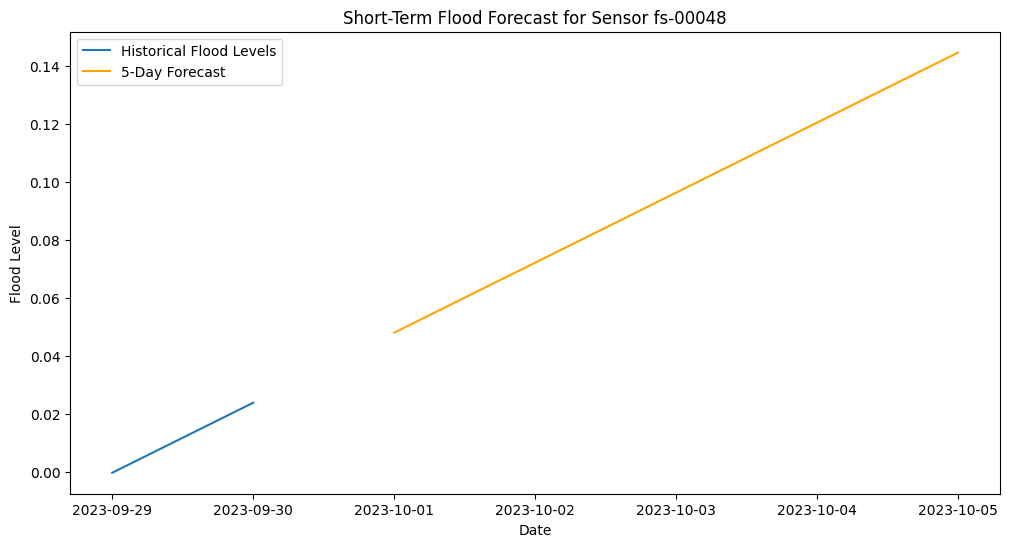

In [8]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit a simple exponential smoothing model for short-term forecasting
sensor_to_forecast = location_risks.index[0]
sensor_data = flood_data[sensor_to_forecast].resample('D').mean().ffill()

model = ExponentialSmoothing(sensor_data, trend="add", seasonal=None)
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)  # Short-term forecast

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(sensor_data, label="Historical Flood Levels")
plt.plot(forecast, label="5-Day Forecast", color='orange')
plt.title(f"Short-Term Flood Forecast for Sensor {sensor_to_forecast}")
plt.xlabel("Date")
plt.ylabel("Flood Level")
plt.legend()
plt.show()

# Explanation:
# - Short-term forecasts help prepare for near-future flood risks in high-risk areas.
# - This forecasting model is simple but effective for limited data.
    

### Step 8: Future Integration with Weather Data for Enhanced Prediction


In future analyses, integrating external datasets such as rainfall, temperature, and tidal data from sources like NYC Open Data or NOAA could enhance the predictive power of flood models.
Potential integrations include:
- **Rainfall and Flood Level Correlation**: Determining if rainfall spikes align with flood events.
- **Temperature and Snow Melt**: For winter flood prediction in combination with temperature trends.
- **Storm Surge Levels**: Leveraging tidal and storm surge data for coastal flooding.

Combining these factors with flood sensor data could lead to more accurate flood risk assessments.
    